## Domanda Teorica

Descrivere con proprie parole (not CHAT-GPT oriented) il concetto di time series forecasting e cosa lo differenzia dai problemi di regressione standard, fornendo esempi ed applicazioni/limiti.

Il time series forecasting  è una tecnica utilizzata per prevedere i valori futuri di una serie di dati che sono raccolti nel tempo e sono correlati tra loro.

La principale differenza tra il time series forecasting e i problemi di regressione standard sta nella natura dei dati. Nei problemi di regressione standard, i dati sono indipendenti tra loro e non c'è dipendenza temporale significativa. Nel time series forecasting, la sequenza temporale dei dati è importante e viene utilizzata per fare previsioni future.

Ad esempio, se consideriamo una serie storica di rilevazioni della temperatura di una città x, il time series forecasting viene utilizzato per prevedere le temperature future in base ai dati storici, come le temperature degli ultimi 12 mesi.

Un caso di problema di regressione standard invece può essere l'analisi delle nascite in un paese, in cui le nascite in un t+1 non è condizionato dalle nascite in t. Correlare le nascite al tempo sarebbe inutile/controproducente.

## Fake news Detection

In [1]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv
path_fake = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv'
path_true = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv'

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_fake = pd.read_csv(path_fake)
df_true = pd.read_csv(path_true)
df_fake["class"] = 0 #fake
df_true["class"] = 1 #real

df_marge = pd.concat([df_fake, df_true], axis =0 )
df = df_marge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,text,class
0,WASHINGTON (Reuters) - Donald Trump will trave...,1
1,The answers to questions about Donald Trump by...,0
2,21st Century Wire says Our weekly documentary ...,0
3,ter ror ist ter r st/ noun a person who uses ...,0
4,21st Century Wire says ISIS inspired. Assad s ...,0
...,...,...
44893,"As a writer, especially as a writer who writes...",0
44894,Here is the Gateway Pundit s real news accou...,0
44895,New York City s radical leftist Democrat Mayor...,0
44896,"When it gets down to it, what this sheriff sai...",0


In [5]:
patterns = {
            r'\d+': '',             
            r'[^\w\s]': '',         
            r'\b\w{1,2}\b':'',      
            r'(http|www)[^\s]+':'', 
            r'\s+': ' '             
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() 
    return df


clean_column(df, 'text', patterns)

,text,class
0,washington reuters donald trump will travel as...,1
1,the answers questions about donald trump room ...,0
2,century wire says our weekly documentary scre...,0
3,ter ror ist ter noun person who uses terrorism...,0
4,century wire says isis inspired assad barrel ...,0
...,...,...
44893,writer especially writer who writes controver...,0
44894,here the gateway pundit real news account sean...,0
44895,new york city radical leftist democrat mayor b...,0
44896,when gets down what this sheriff said the hear...,0


In [6]:
df = clean_column(df, 'text', patterns)
df

,text,class
0,washington reuters donald trump will travel as...,1
1,the answers questions about donald trump room ...,0
2,century wire says our weekly documentary scre...,0
3,ter ror ist ter noun person who uses terrorism...,0
4,century wire says isis inspired assad barrel ...,0
...,...,...
44893,writer especially writer who writes controver...,0
44894,here the gateway pundit real news account sean...,0
44895,new york city radical leftist democrat mayor b...,0
44896,when gets down what this sheriff said the hear...,0


In [8]:
df['class'].value_counts()

0    23481
1    21417
Name: class, dtype: int64

In [11]:
df_0 = df[df['class'] == 0]  # DataFrame con classe 0
df_1 = df[df['class'] == 1]  # DataFrame con classe 1

In [12]:
df_0

,text,class
1,the answers questions about donald trump room ...,0
2,century wire says our weekly documentary scre...,0
3,ter ror ist ter noun person who uses terrorism...,0
4,century wire says isis inspired assad barrel ...,0
5,members can join cohosts patrick henningsen a...,0
...,...,...
44892,sometimes politics can get ridiculous that one...,0
44893,writer especially writer who writes controver...,0
44894,here the gateway pundit real news account sean...,0
44895,new york city radical leftist democrat mayor b...,0


In [17]:
lista_0 = df_0['text'].tolist()
lista_1 = df_1['text'].tolist()

In [20]:
stringa_0 = ' '.join(lista_0)
stringa_1 = ' '.join(lista_1)

(-0.5, 799.5, 399.5, -0.5)

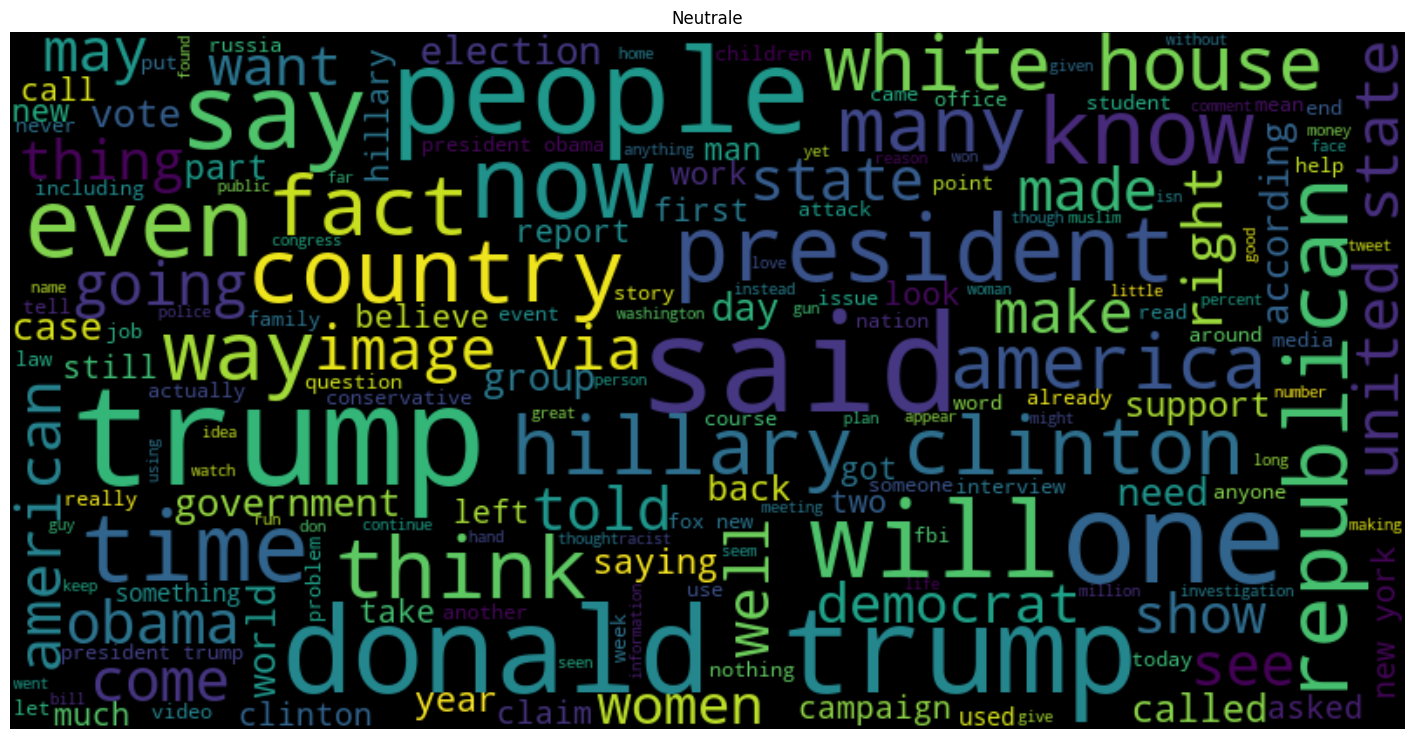

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(stringa_0)

plt.figure(figsize=(18,10))
plt.title('Neutrale')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

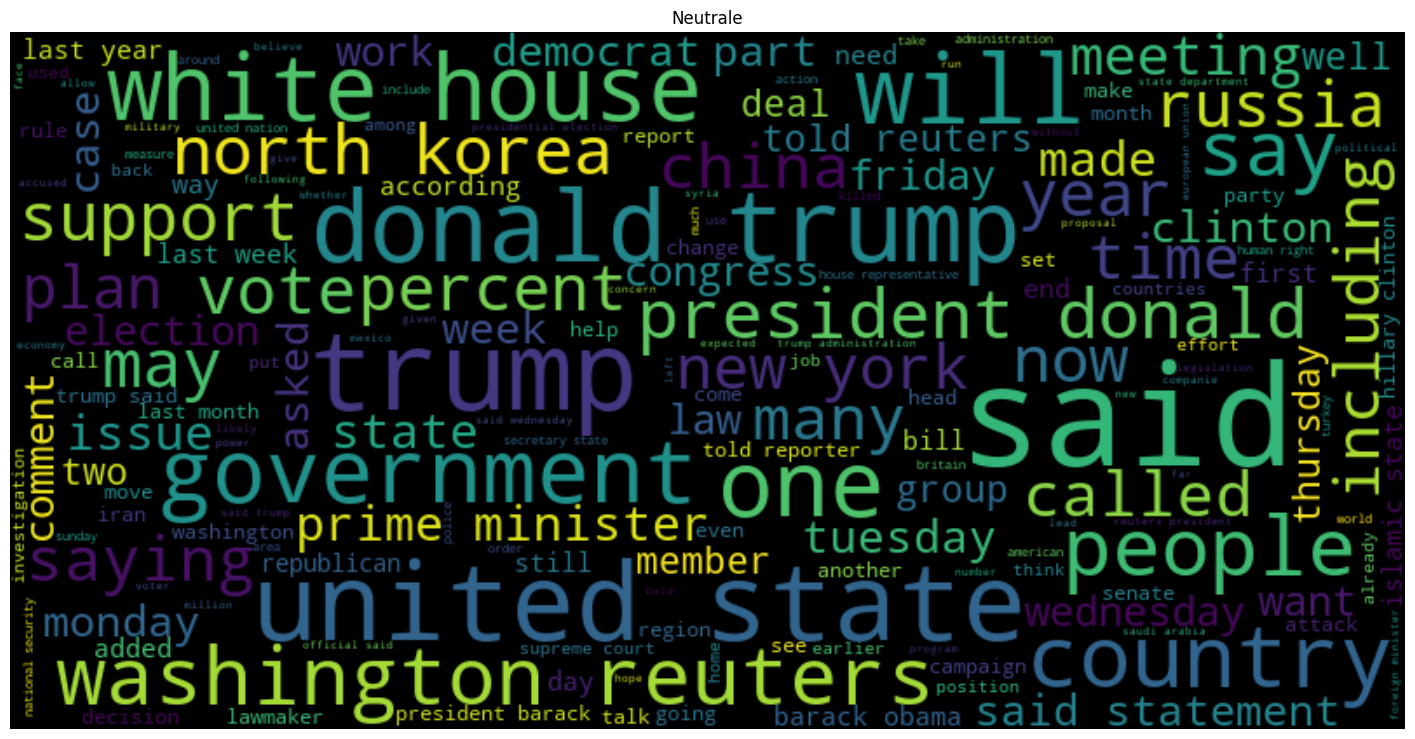

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(stringa_1)

plt.figure(figsize=(18,10))
plt.title('Neutrale')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [26]:
X = df['text']
y = df['class']

X

0        washington reuters donald trump will travel as...
1        the answers questions about donald trump room ...
2         century wire says our weekly documentary scre...
3        ter ror ist ter noun person who uses terrorism...
4         century wire says isis inspired assad barrel ...
                               ...                        
44893     writer especially writer who writes controver...
44894    here the gateway pundit real news account sean...
44895    new york city radical leftist democrat mayor b...
44896    when gets down what this sheriff said the hear...
44897    yangon reuters two reuters reporters arrested ...
Name: text, Length: 44898, dtype: object

In [27]:
##STEP 4: Vettorizzazione
from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
vectorizer = CountVectorizer(stop_words='english',max_features=1500, min_df=5, max_df=0.7)
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.03775062, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.07216338, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09276988,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
##STEP 6: Split Training and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [30]:
##STEP 7: Modellazione
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9899777282850779

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_mn = classifier.predict(X_test)
mn_accuracy = accuracy_score(y_mn, y_test)
mn_accuracy

0.9298440979955457

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7021
           1       0.99      0.99      0.99      6449

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Text(95.72222222222221, 0.5, 'Actual')

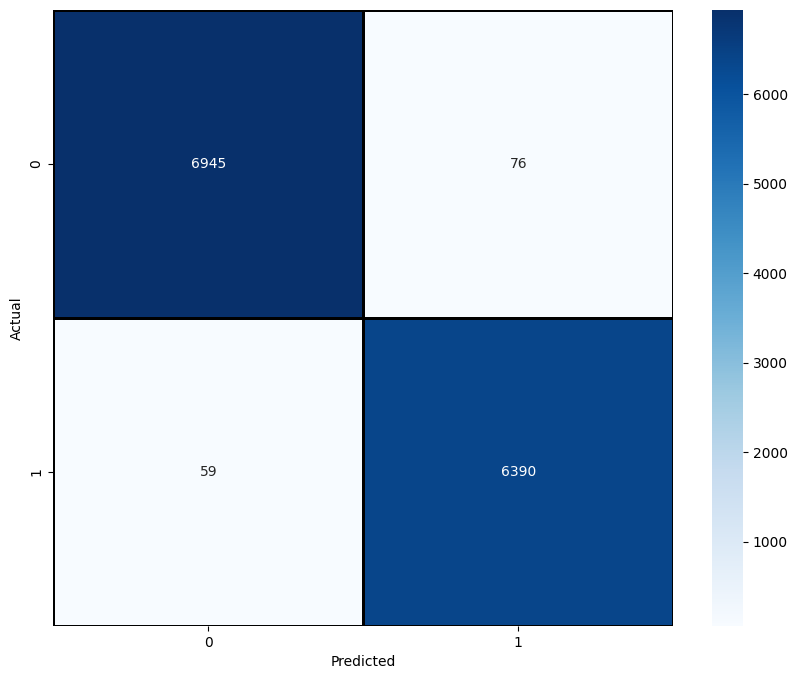

In [34]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [35]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.9600593912397921

In [36]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf = MultinomialNB(alpha=0.1)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9330363771343727


In [37]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7021
           1       0.93      0.93      0.93      6449

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



Text(95.72222222222221, 0.5, 'Actual')

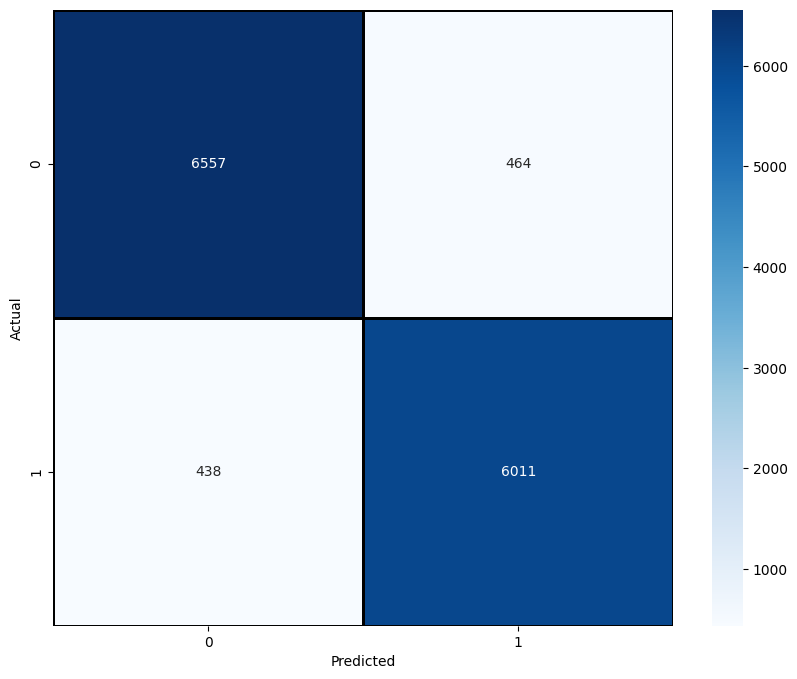

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [40]:
import numpy as np

In [41]:
# Step 10: Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.9319437  0.92962765 0.9315752  0.9315752  0.93353528 0.9349608
 0.93531718 0.93353528]
mean=0.932758785385063
std=0.0017982720880444568


In [42]:
import joblib
joblib.dump(pipe,'fakeortrue.pkl')

['fakeortrue.pkl']

In [55]:
uploaded_model = joblib.load('fakeortrue.pkl')
pred = uploaded_model.predict(['a me me piac a nutell']) #
pred[0]

0